Final Project Submission  
Please fill out:  

Student name: MARWA OSMAN  
Student pace:full time    
Scheduled project review date:23/03/2023  

# Movie Analysis Project

<p align="center">
  <img src="./image.jpeg" alt="movie">
</p>



# Overview

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Business Understanding

Microsoft is seeking to create a new movie studio and wants to understand what types of films are currently popular at the box office. They are looking to use data science to analyze market trends and gain insights into what factors contribute to a film's success. By understanding what types of films are resonating with audiences, Microsoft can make informed decisions on what types of films to produce and market. This will allow them to increase their chances of success in the competitive film industry.

The business problem is that Microsoft wants to create a new movie studio but doesn't have any knowledge or experience in the movie industry. They need to determine what types of films are currently successful at the box office in order to make informed decisions about what types of films to produce. By understanding the current trends and patterns in the film industry, Microsoft can increase the chances of producing successful and profitable films.

DATA UNDERSTANDING

The movie dataset that i will be working with are from:
[Box Office Mojo] (https://www.boxofficemojo.com/),
[IMDB] (https://www.imdb.com/), 
[TheMovieDB] (https://www.themoviedb.org/),
[The Numbers] (https://www.the-numbers.com/)

The data sources are popular online based websites that most people use to refer to when looking up what movies to watch.

These datasets contain data about the movies that have aired over the years , the trend of popularity , the overall gross and genres, etc.
These datasets will help in determining what sort of movie for the studio to invest in.


In [1]:
#import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

In [2]:
#read the csv files into a DataFrame
bom_df = pd.read_csv("bom.movie_gross.csv")
tmdb_df = pd.read_csv("tmdb.movies.csv", index_col=0)
tn_df = pd.read_csv("tn.movie_budgets.csv")

In [3]:
#connect the IMDB database
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [4]:
#finding table names in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [5]:
#merging the two needed tables in IMDB using a common key 
q="""
SELECT * 
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)
;
"""
imdb_df = pd.read_sql(q, conn)
#display the DataFrame
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [6]:
#summary of the DataFrame structure
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The above DataFrame has 8 columns and 73856 rows.
runtime_minutes has 7620 missing data.
Genres column has 804.The data types are all correct

The above DataFrame has 8 columns and 73856 rows.

In [7]:
#display the DataFrame
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
#summary of the DataFrame structure
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


The above DataFrame has 26517 entries and 9 columns.There is no missing data.

In [9]:
#display the DataFrame
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
#summary of the DataFrame structure
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above DataFrame has  5782 entries and 6 column.
There is no missing data.production budget, domestic gross and worldwide gross has the wrong datatype.

In [11]:
#display the DataFrame
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
#summary of the DataFrame structure
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The above dataframe has 3387 entries and 5 columns.Foreign_gross column has 1350 missing data.
domestic_gross has 5 missing data.The datatype of foreign_gross is not correct.

# Data Preparation

This will involve data cleaning and data transformation to ensure that the data is suitable for analysis and that the results of the analysis are valid and reliable.

In [13]:
# summary of the DataFrame structure 
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


since the above DataFrame does not have missing values but wrong datatypes, I will change them as shown below.

In [14]:
# Use str.replace() to remove dollar signs and commas from the 'production' column and change its datatpe to float
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_6340\2755836163.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)


In [15]:
# Use str.replace() to remove dollar signs and commas from the domestic_gross column and change its datatpe to float
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_6340\4071497114.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [16]:
# Use str.replace() to remove dollar signs and commas from the 'worldwide_gross' column and change its datatpe to float
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_6340\3675618142.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)


In [17]:
#confirm dtype has changed
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [18]:
#check the sum of missing values in each colum
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
#sample of the missing data in the studio
missing_studio_sample = bom_df[bom_df["studio"].isna()].sample
missing_studio_sample

<bound method NDFrame.sample of                               title studio  domestic_gross foreign_gross  year
210   Outside the Law (Hors-la-loi)    NaN         96900.0       3300000  2010
555         Fireflies in the Garden    NaN         70600.0       3300000  2011
933           Keith Lemon: The Film    NaN             NaN       4000000  2012
1862                 Plot for Peace    NaN          7100.0           NaN  2014
2825               Secret Superstar    NaN             NaN     122000000  2017>

for this case it is safe to drop rows with mising values in this studio column since the missing entries are few and wont affect the  analysis.

In [20]:
#drop the missing entries
bom_df.dropna(subset=['studio'], inplace=True)


For domestic gross column , the whole column can be dropped since the above DataFrame(tn_df) already has this column.

In [21]:
bom_df = bom_df.drop(['domestic_gross'], axis=1)

since foreigh foreign gross have the wrong data type,i will check for place holders and ultimately change it to float
in order to carry out the necessary arithmetic 

In [22]:
#find the unique values
foreign_gross = bom_df['foreign_gross'].unique()
print(foreign_gross)

['652000000' '691300000' '664300000' ... '530000' '256000' '30000']


The above has no place holder rather just numbers in str format

In [23]:
# change the dtype from object to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '').astype(float)

In [24]:
#check the dtype
print(bom_df['foreign_gross'].astype)

<bound method NDFrame.astype of 0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3382, dtype: float64>


I will replace the missing values with average of the rest since this is a continuous data and the column will be useful for this analysis.

In [25]:
#use average to replace the missing values 
bom_df['foreign_gross'].fillna(value=bom_df['foreign_gross'].mean(), inplace=True)

In [26]:
#confirm if there is any missing value left
bom_df.isna().sum()

title            0
studio           0
foreign_gross    0
year             0
dtype: int64

In [27]:
#confirm whether all changes were effective
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3382 non-null   object 
 1   studio         3382 non-null   object 
 2   foreign_gross  3382 non-null   float64
 3   year           3382 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.1+ KB


In [28]:
#IBMD DATA CLEANING
#check the sum of missing values in each column
imdb_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [29]:
#check the entries of the run_time column
imdb_df['runtime_minutes'].head()

0    175.0
1    114.0
2    122.0
3      NaN
4     80.0
Name: runtime_minutes, dtype: float64

In [30]:
#replace the missing values with the median of the dataset
imdb_df['runtime_minutes'].fillna(value=imdb_df['runtime_minutes'].median(), inplace=True)

genres- best to drop the rows with no values.This wont affect the analysis since we have enough entries to work with

In [31]:
#drop the rows with missing values ,inplace is use to keep the change permanent
imdb_df.dropna(subset=['genres'], inplace=True)

In [32]:
#confirm there is no missing entries
imdb_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

merge the the four dataframe

In [33]:
#merging tmdb_df and tn_df with columns that has similar values
merged_df1 = pd.merge(tmdb_df, tn_df, left_on='title', right_on='movie')
#merging bom_df and imbd_df with columns that has similar values
merged_df2 = pd.merge(bom_df, imdb_df,  left_on='title', right_on='primary_title')


In [34]:
#merge the two to get one DataFrame
merged_df = pd.merge(merged_df2, merged_df1, on='title')

In [35]:
#check summary of merged Database structure
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 0 to 1782
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1783 non-null   object 
 1   studio             1783 non-null   object 
 2   foreign_gross      1783 non-null   float64
 3   year               1783 non-null   int64  
 4   movie_id           1783 non-null   object 
 5   primary_title      1783 non-null   object 
 6   original_title_x   1783 non-null   object 
 7   start_year         1783 non-null   int64  
 8   runtime_minutes    1783 non-null   float64
 9   genres             1783 non-null   object 
 10  averagerating      1783 non-null   float64
 11  numvotes           1783 non-null   int64  
 12  genre_ids          1783 non-null   object 
 13  id_x               1783 non-null   int64  
 14  original_language  1783 non-null   object 
 15  original_title_y   1783 non-null   object 
 16  popularity         1783 

In [36]:
merged_df.head()

,title,studio,foreign_gross,year,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,...,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",...,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",...,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",...,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",...,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",...,28.515,2010-05-07,6.8,12368,15,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,6.211564e+08


In [37]:
#confirm whether this columns have similar values 
merged_df['primary_title'] == merged_df['title']
merged_df['title'] == merged_df['original_title_x']
merged_df['title'] == merged_df['movie']
merged_df['title'] == merged_df['original_title_y']

0       True
1       True
2       True
3       True
4       True
        ... 
1778    True
1779    True
1780    True
1781    True
1782    True
Length: 1783, dtype: bool

In [38]:
# since the above columns are the same we can drop them and remain with one.
merged_df = merged_df.drop(['primary_title', 'original_title_x', 'movie', 'original_title_y'], axis=1)


In [39]:
#check for duplicates
duplicates = merged_df[merged_df.duplicated()]
print(len(duplicates))

160


In [40]:
#remove the duplicates
merged_df = merged_df.drop_duplicates()

In [41]:
#confirm all above changes was successful
merged_df.head()

,title,studio,foreign_gross,year,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,...,original_language,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000.0,2010,tt0435761,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,...,en,24.445,2010-06-17,7.7,8340,47,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
1,Inception,WB,535700000.0,2010,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,...,en,27.920,2010-07-16,8.3,22186,38,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,513900000.0,2010,tt0892791,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,...,en,15.041,2010-05-16,6.1,3843,27,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,tt1325004,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,...,en,20.340,2010-06-23,6.0,4909,53,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,311500000.0,2010,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,...,en,28.515,2010-05-07,6.8,12368,15,"May 7, 2010",170000000.0,312433331.0,6.211564e+08


# Data Analysis

The above DataFrame will be analysed to derive conclusions and recommendation to solve the business problem

I will group the data by genres and calculate the total domestic gross, foreign gross and world wide gross to find out the genres that brings in alot of profit.

In [42]:
# Group the data by genre and calculate the total domestic gross
genres_gross = merged_df.groupby('genres')['domestic_gross'].sum()
# Sort the genres by total domestic gross and select the top 5
top_genres_gross = genres_gross.sort_values(ascending=False).head()
print(top_genres_gross)

genres
Action,Adventure,Sci-Fi       1.166065e+10
Adventure,Animation,Comedy    1.040478e+10
Action,Adventure,Fantasy      4.079129e+09
Drama                         3.281878e+09
Action,Adventure,Comedy       2.783837e+09
Name: domestic_gross, dtype: float64


In [43]:
# Group the data by genre and calculate the total foreign gross
genres_gross2 = merged_df.groupby('genres')['foreign_gross'].sum()
# Sort the genres by total foreign gross and select the top 5
top_genres_gross2 = genres_gross2.sort_values(ascending=False).head()
print(top_genres_gross2)

genres
Adventure,Animation,Comedy    1.919921e+10
Action,Adventure,Sci-Fi       1.700540e+10
Action,Adventure,Fantasy      8.272500e+09
Drama                         6.421825e+09
Action,Adventure,Drama        4.873189e+09
Name: foreign_gross, dtype: float64


In [44]:
# Group the data by genre and calculate the total worldwide gross
genres_gross3 = merged_df.groupby('genres')['worldwide_gross'].sum()
# Sort the genres by total worldwide gross and select the top 5
top_genres_gross3 = genres_gross3.sort_values(ascending=False).head()
top_genres_gross3

genres
Action,Adventure,Sci-Fi       3.097023e+10
Adventure,Animation,Comedy    2.947104e+10
Action,Adventure,Fantasy      1.228145e+10
Action,Adventure,Comedy       7.438282e+09
Drama                         7.004003e+09
Name: worldwide_gross, dtype: float64

Below is The visualization of the above to further undestand the trend of the genres that earns the most

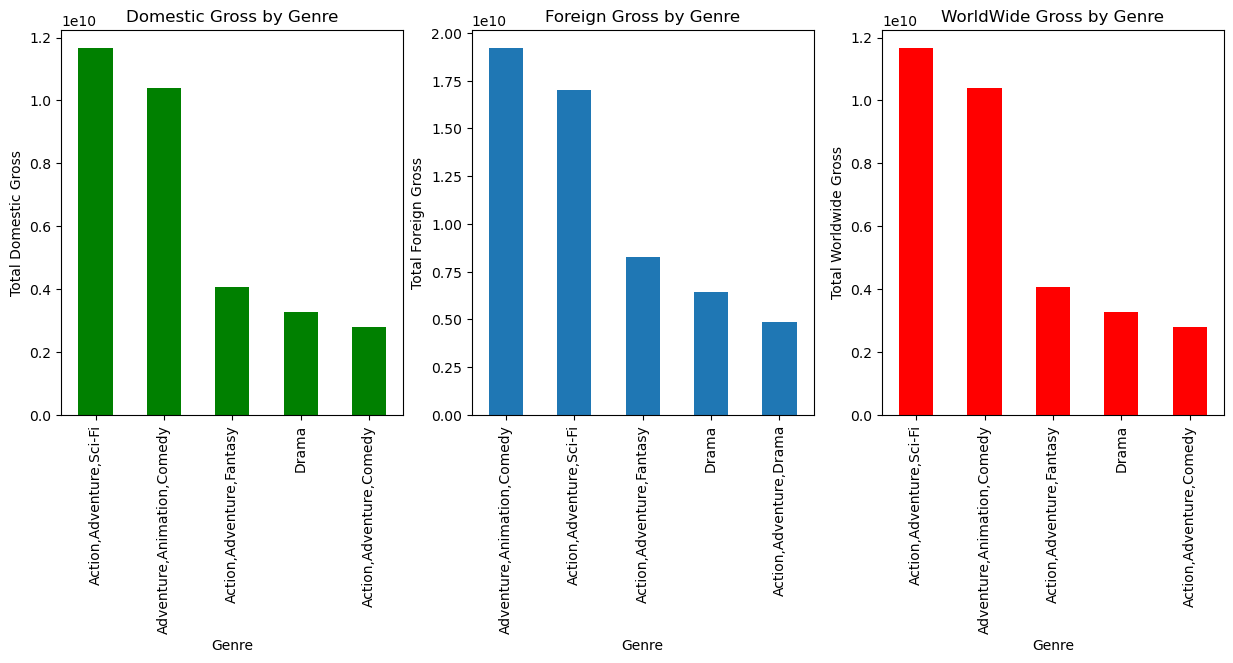

In [45]:
# create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
# plot the data on each subplot

top_genres_gross.plot(kind='bar', ax=ax1, color='green')
ax1.set_title('Domestic Gross by Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Total Domestic Gross')

top_genres_gross2.plot(kind='bar', ax=ax2)
ax2.set_title('Foreign Gross by Genre')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Total Foreign Gross')

top_genres_gross.plot(kind='bar', color='red')
ax3.set_title('WorldWide Gross by Genre')
ax3.set_xlabel('Genre')
ax3.set_ylabel('Total Worldwide Gross')

plt.show();



The above bar charts show the top 5 genres of movies that are highly profitable.

The domestic gross bar chart shows that the genres are Action, Adventure and sci-fi are the most profitable to invest in. I recommend this if the target audience of the movies is the domestic market(USA).

Foreign gross by genre bar chart shows that the most profitable genres catering to the international market besides the domestic market are Adventure, Animation and Comedy since it brings in the highest gross profit. This should be the recommended genres to invest in if the target audience of the movie to be created is the foreign market.

worldwide gross by genre bar chart shows that Action,   adventure and Sci-fi is the most profitable genre to invest in.This is the ideal recommended genres to invest in if the target audience is both the domestic market and the international market.I recommend this because from the visualization above the genres Action, adventure and Sci-fi are the top in both domestic and worldwide gross.

This will help the company avoid risky investments and maximize their chances of success according to the desired target market for the production of the movie.

I have created a histogram of movie runtimes using the hist() method.
I've set the number of bins to 30, which will create 30 evenly-spaced bins for the range of values in the runtime minutes column.
The histogram of movie runtimes shows the frequency distribution of movies across different runtime intervals. 
This plot can help you identify if there are any common runtime intervals for successful movies, or if there is a trend toward shorter or longer movies. 

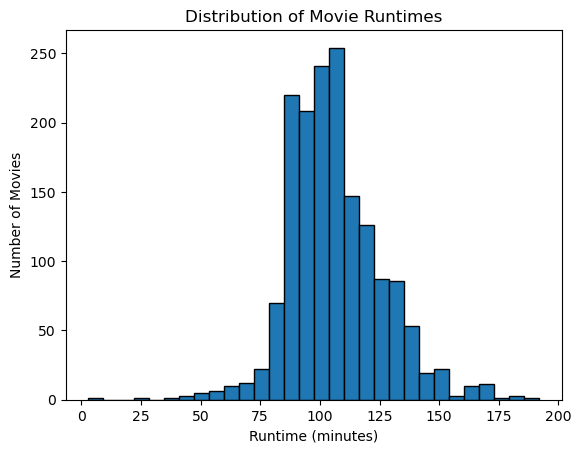

In [46]:
# Plot the distribution of movie runtimes
fig, ax = plt.subplots()
ax.hist(merged_df['runtime_minutes'], bins=30, edgecolor='black')
ax.set_title('Distribution of Movie Runtimes')
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Number of Movies')
plt.show();

According to above distribution of runtime(minutes) it seems most movies follow the trend of having a runtime of between 100 and 110 minutes.
i would recommend to follow this trend like the rest of the movies in production to maximize he chances of success for the production of the movies.

I will find the movie genres that will cost least to produce by grouping data by genres and calculate total production budget to find the least production cost

In [47]:
# group data by genres and calculate total production budget
pro_df = merged_df.groupby('genres')['production_budget'].sum()
#sort the production budget from least 
least_pro_df = pro_df.sort_values(ascending=True).head()
least_pro_df


genres
Adventure,Drama,Mystery     500000.0
Comedy,Thriller             800000.0
Adventure,Horror           1000000.0
Drama,Mystery              2000000.0
Crime,Documentary          2000000.0
Name: production_budget, dtype: float64

Visualization to represent the above

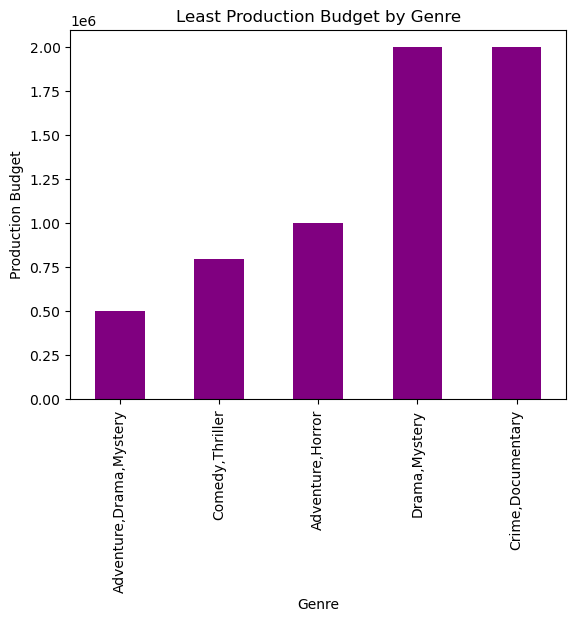

In [48]:
#bar graph to show the above

least_pro_df.plot(kind='bar', color='purple')
#plot axis
plt.title('Least Production Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Production Budget')
plt.show();

From the bar graph above, the genres that will cost the least to produce a movie is Adventure, Drama, Mystery.I would recommend this if Microsoft is interested in incurring minimal cost for the production of their first movie release.

look at the features of the most successful and most popular movie gauge its characteristics

In [49]:
# Sort the DataFrame by worldwide gross and popularity
successful_movies = merged_df.sort_values(by=['worldwide_gross','popularity'], ascending=False)
# Filter the DataFrame to include only movies with a high worldwide gross and popularity
successful_movies = successful_movies[(successful_movies['worldwide_gross'] > 100000000) & (successful_movies['popularity'] > 50)]

# Print the top successful movie
print('The details of the most successfull movie: \n', successful_movies[['title', 'worldwide_gross', 'popularity']].iloc[0])
# Print the genres of top successful movie
print('The genres of the top successful movie is: ', successful_movies['genres'].iloc[0])
print('The runtime minutes is :', successful_movies['runtime_minutes'].iloc[0])

The details of the most successfull movie: 
 title              Avengers: Infinity War
worldwide_gross              2048134200.0
popularity                         80.773
Name: 1633, dtype: object
The genres of the top successful movie is:  Action,Adventure,Sci-Fi
The runtime minutes is : 149.0


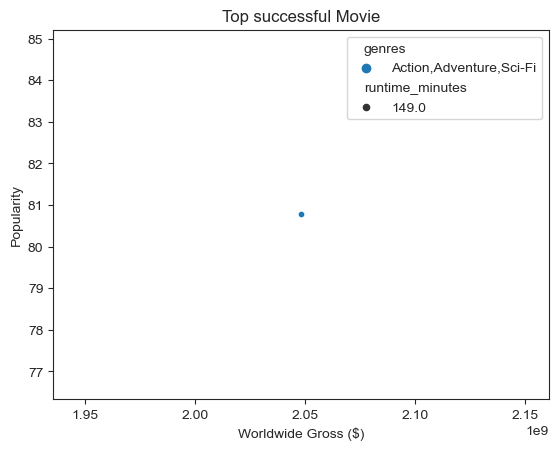

In [50]:
#use seaborn to plot a scatter plot
#set style
sns.set_style('ticks')

#filter the Dtaframe to give only tp successful movie
top_movie = successful_movies.head(1)

#create scatter plot of worldwide gross and popularity for the top movie
sns.scatterplot(data=top_movie, x='worldwide_gross', y='popularity', hue='genres', size='runtime_minutes', sizes=(20, 200))

plt.title('Top successful Movie')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Popularity')
plt.show();


Another alternative recommendation is simply to follow the trend of the most successful movie to be made so far.
Adapting its genres and runtime might lead to the success of the movie to be produced as this will cater to the popularity factor and people choice.The total worlwide gross of the movie also shows the profitability of following this trend.
According the above visualization the genres of the most successful movie is Action, Adventure and Sci-fi and the runtime minutes is 149.

# Conclusion

In conclusion from the analysis genres is the main factor that should be considered when deciding what type of movies to produce.  
From above the analysis the ideal genres to invest in depend on the target audience.    
The genres I highly recommend Microsoft to invest in are Action, Adventure, and Sci-Fi since this genre has the top total domestic gross and worldwide gross. This will ensure success in the domestic market and worldwide markets.  

If the target audience of the movie to be created is the international market excluding the domestic market, Microsoft should invest in Adventure, Animation, and Comedy genre since it brings in the highest Foreign gross profit.

In consideration of the production cost, the genres with the least production cost are Adventure,Drama,Mystery.Microsoft should conider this option if the main goal is to produce a movie with the least cost incurred but this will not quarantee the success of the movie.This might help Microsoft to test how a movie being produced by them is being perceived by the general public without incurring much loss.    

The ideal runtime according to the popular trend folowed by most movies in  production is between 100 and 110 minutes.This couls be a good start for the production of the first Microsoft movie and will be in accordance with what people expect the length of  movie to be.   

Microsoft can also consider adapting the trend of the most popular movie of all time which have a runtime of 149 minutes and genres of Action, Adventure, and Sci-Fi. This will ensure the popularity of the movie

